# U.S. Medical Insurance Costs

### Author: Rafael Brisighello

## Objectives

1) To create a predictive model for estimating insurance costs based on the linear regression technique for multiple variables, taking into account factors such as sex, bmi, age, number of children and region.

2) To explore differences in charges between different regions

## Importing Packages

In [199]:
import csv
import numpy as np
from decimal import *
from matplotlib import pyplot as plt

## Importing Data

In [37]:
age_raw_data = []
sex_raw_data = []
bmi_raw_data = []
children_raw_data = []
smoker_raw_data = []
region_raw_data = []
charges_raw_data = []

with open('insurance.csv', newline = '') as insurance_file:
    data_reader = csv.DictReader(insurance_file)
    for row in data_reader:
        age_raw_data.append(row['age'])
        sex_raw_data.append(row['sex'])
        bmi_raw_data.append(row['bmi'])
        children_raw_data.append(row['children'])
        smoker_raw_data.append(row['smoker'])
        region_raw_data.append(row['region'])
        charges_raw_data.append(row['charges'])     

## Data Filtering and Transformation

### Age Data to Int

In [38]:
age_data = [int(age) for age in age_raw_data]

### Sex Data to Binary ( female = 0, male = 1 )

In [39]:
sex_data = [0 if sex == 'female' else 1 for sex in sex_raw_data]

### BMI Data to Decimal

In [44]:
bmi_data = [float(bmi) for bmi in bmi_raw_data]

### Children Data To Int

In [45]:
children_data = [int(children) for children in children_raw_data]

### Smoker Data to Binary

In [46]:
smoker_data = [0 if smoker == 'no' else 1 for smoker in smoker_raw_data]

### Charge Data to Float

In [51]:
charges_data = [float(charges) for charges in charges_raw_data]

### Region Data to Int

In [55]:
region_data = [1 if region == 'southwest' else 2 if region == 'southeast' else 3 if region == 'northeast' else 4 for region in region_raw_data ]

### Data Zip and Regional Based Analysis Data Separation

In [71]:
data_table = zip(age_data, sex_data, bmi_data, children_data, smoker_data, region_data, charges_data)
data_table_list = list(data_table)
print(len(data_table_list))
#print(data_table_list)

1338


#### Southwest Region Data

In [73]:
SW_data = [data for data in data_table_list if data[5] == 1 ]
print(len(SW_data))
#print(SW_data)

325


#### Southeast Region Data

In [74]:
SE_data = [data for data in data_table_list if data[5] == 2 ]
print(len(SE_data))
#print(SE_data)

364


#### Northeast Region Data

In [75]:
NE_data = [data for data in data_table_list if data[5] == 3 ]
print(len(NE_data))
#print(NE_data)

324


#### Northwest Region Data

In [76]:
NW_data = [data for data in data_table_list if data[5] == 4 ]
print(len(NW_data))
#print(NW_data)

325


#### Consistency Check

In [77]:
print((len(SE_data) + len(SW_data) + len(NE_data) + len(NW_data)) == len(data_table_list))

True


#### Tuples to Arrays Conversion

#### X (Matrix) for Multi Parameter Linear Regression - All Regions Together

In [95]:
array_table = []
for row in data_table_list:
    array_table.append(np.asarray([1, row[0], row[1], row[2], row[3], row[4]]))
#print(array_table[0])

x_matrix = np.matrix(array_table)
print(x_matrix)
print(len(x_matrix))

[[ 1.   19.    0.   27.9   0.    1.  ]
 [ 1.   18.    1.   33.77  1.    0.  ]
 [ 1.   28.    1.   33.    3.    0.  ]
 ...
 [ 1.   18.    0.   36.85  0.    0.  ]
 [ 1.   21.    0.   25.8   0.    0.  ]
 [ 1.   61.    0.   29.07  0.    1.  ]]
1338


#### Y (Vector) for Multi Parameter Linear Regression - All Regions Together

In [97]:
y_data = []
for row in data_table_list:
    y_data.append(np.asarray(row[6]))
    
y_vector = np.matrix(y_data).T
print(y_vector)
print(len(y_vector))

[[16884.924 ]
 [ 1725.5523]
 [ 4449.462 ]
 ...
 [ 1629.8335]
 [ 2007.945 ]
 [29141.3603]]
1338


#### Coefficients Vector Calculation by Multi Parameter Linear Regression - Example for Whole Data Table

In [102]:
b_vector = (x_matrix.T * x_matrix).I * x_matrix.T * y_vector

print(b_vector)

[[-12052.46198566]
 [   257.73498767]
 [  -128.63985357]
 [   322.36421449]
 [   474.41112061]
 [ 23823.39253065]]


## Function Definitions

### X Matrix Calculation

In [113]:
def X_Matrifier(data_table):
    array_table = []
    for row in data_table:
        array_table.append(np.asarray([1, row[0], row[1], row[2], row[3], row[4]]))
    x_matrix = np.matrix(array_table)
    return x_matrix

### Y Vector Calculation

In [114]:
def Y_Vectorizer(data_table):
    y_data = []
    for row in data_table:
        y_data.append(np.asarray(row[6]))
    y_vector = np.matrix(y_data).T
    return y_vector

### Coefficients (b) Vector Calculation

In [109]:
def B_Vector(x_matrix, y_vector):
    return (x_matrix.T * x_matrix).I * x_matrix.T * y_vector

### Vector Printing

In [155]:
def Vector_Print(vector):
    for coord in vector:
        print(coord, end = '')

### Charge Estimation

In [245]:
def Estimate_Charge(person, b_vector):
    person_vector = np.asarray(person)
    estimate = person_vector * b_vector
    return np.asarray(estimate)[0]

## Regional Analysis Calculations

### 1) Southwest

#### X an Y calculations

In [115]:
x_matrix_SW = X_Matrifier(SW_data)
print(len(x_matrix_SW))

325


In [116]:
y_vector_SW = Y_Vectorizer(SW_data)
print(len(y_vector_SW))

325


#### Coefficients Calculation

In [117]:
b_vector_SW = B_Vector(x_matrix_SW, y_vector_SW)
print(b_vector_SW)

[[-10499.58547064]
 [   269.07852871]
 [  -468.78232903]
 [   258.90679232]
 [    25.61513969]
 [ 25294.67245815]]


## 2) Southeast

#### X and Y calculations

In [118]:
x_matrix_SE = X_Matrifier(SE_data)
print(len(x_matrix_SE))

364


In [119]:
y_vector_SE = Y_Vectorizer(SE_data)
print(len(y_vector_SE))

364


#### Coefficients Calculation

In [120]:
b_vector_SE = B_Vector(x_matrix_SE, y_vector_SE)
print(b_vector_SE)

[[-14336.28226344]
 [   271.98321903]
 [  -259.65459332]
 [   343.05238392]
 [   473.5470981 ]
 [ 26703.16619467]]


## 3) Northeast

#### X and Y calculations

In [121]:
x_matrix_NE = X_Matrifier(NE_data)
print(len(x_matrix_NE))

324


In [122]:
y_vector_NE = Y_Vectorizer(NE_data)
print(len(y_vector_NE))

324


#### Coefficients Calculation

In [123]:
b_vector_NE = B_Vector(x_matrix_NE, y_vector_NE)
print(b_vector_NE)

[[-13490.57224186]
 [   235.30094154]
 [    26.16644915]
 [   429.5411375 ]
 [   707.90240333]
 [ 21142.10270945]]


## 4) Northwest

#### X and Y calculations

In [124]:
x_matrix_NW = X_Matrifier(NW_data)
print(len(x_matrix_NW))

325


In [125]:
y_vector_NW = Y_Vectorizer(NW_data)
print(len(y_vector_NW))

325


#### Coefficients Calculation

In [126]:
b_vector_NW = B_Vector(x_matrix_NW, y_vector_NW)
print(b_vector_NW)

[[-1.12302285e+04]
 [ 2.47195571e+02]
 [-5.07521352e+00]
 [ 3.13268207e+02]
 [ 8.53246869e+02]
 [ 2.14857683e+04]]


## Coefficients Vectors Comparison Between Regions

In [210]:
b_vectors = [b_vector, b_vector_SW, b_vector_SE, b_vector_NE, b_vector_NW]

b_vector_list = []
for vector in b_vectors:
    b_vector_list.append(vector.tolist())

#print(b_vector_list)
#print()

for vector in b_vector_list:
    Vector_Print(vector)
    print()

[-12052.461985664595][257.73498766924456][-128.63985356968448][322.3642144860701][474.41112061269126][23823.392530652607]
[-10499.585470636266][269.0785287098719][-468.7823290291716][258.90679232137006][25.615139688987597][25294.672458151043]
[-14336.282263444362][271.9832190315296][-259.654593321746][343.0523839219452][473.5470981018068][26703.166194667458]
[-13490.572241862867][235.30094153602175][26.166449154616885][429.5411375042779][707.9024033316985][21142.102709449508]
[-11230.228546146946][247.1955712294931][-5.075213524418132][313.2682072807848][853.2468693072567][21485.768292257577]


## Estimates - Global and Regional - Exploring Differences

### 6 scenario choices - different personas

#### Male, young, on weight, no children and no smoker

In [313]:
person0 = (1, 18, 1, 22.00, 0, 0)

#### Female, young, on weight, no children, no smoker

In [314]:
person1 = (1, 22, 0, 20.00, 0, 0)

#### Female, middle age, high BMI, mother of 3, no smoker

In [315]:
person2 = (1, 40, 0, 27.00, 3, 0)

#### Male, middle age, medium BMI, father of 1, smoker

In [316]:
person3 = (1, 37, 1, 24.00, 1, 1)

#### Male, elder, high BMI, father of 2, smoker

In [317]:
person4 = (1, 70, 1, 30.00, 2, 1)

#### Female, elder, low BMI, no children, smoker

In [318]:
person5 = (1, 80, 0, 19.00, 0, 1)

### Scenarios Estimates - Global and Regional

In [319]:
person_list = [person0, person1, person2, person3, person4, person5]

In [320]:
results = {}

for i in range(0,5):
    result_list = []
    for person in person_list:
        result_list.append(Estimate_Charge(person, b_vectors[i])[0])
    results[i] = result_list
        
print(results)

{0: [-449.85934249433467, 64.9920327801874, 8384.004674067157, 29389.637503458747, 40303.488504072935, 38514.649633762914], 1: [-429.0048518176027, 598.2780074083166, 7330.884489502565, 30521.588376152733, 40980.23571719571, 41240.59833841056], 2: [-2153.0864679157803, -1491.6037663118068, 7226.102158014763, 30877.412754296434, 42384.72038397039, 40643.53674826242], 3: [220.91618003425538, 276.8712220151683, 9642.783342188603, 27400.72145700843, 38450.80175605451, 34636.887403049666], 4: [106.11708263677701, 473.4381665175988, 9675.576507535738, 27768.38451212355, 38658.69447568879, 35983.28138280499]}


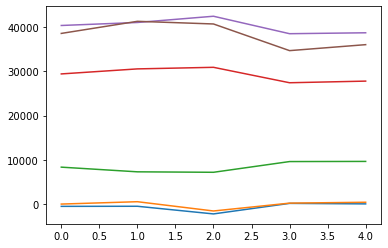

In [321]:
plt.plot(results.keys(), results.values())

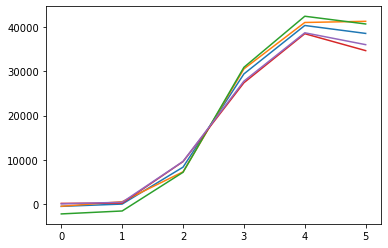

In [322]:
for region in results.keys():
    plt.plot(results[region])

In [323]:
personal_data = {}

In [324]:
personal_data[2] = [result[2] for result in results.values()]

In [325]:
personal_data[3] = [result[3] for result in results.values()]

In [326]:
personal_data[4] = [result[4] for result in results.values()]

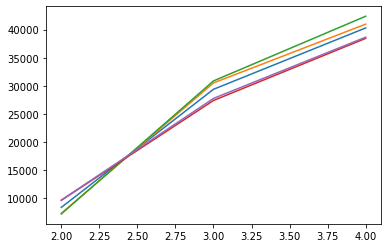

In [328]:
plt.plot(range(2,5), [personal_data[i] for i in range(2,5)])

## Conclusions

1) After data filtering and adequate preparation, a linear regreesion model was derived for global as well as regional data

2) Individual coeeficients can be compared in order to understand better how each factor plays a role in the total charge applied in the insurance packages

3) Data shows that the single most important factor in determining the charges is the smoker status, as can be seen by it's large coefficient (in global and regional data) and by the second plot, which shows a large charge difference between people whose main difference is the smoker status

4) There are important regional differences in charges applied. As can be concluded by the coefficient matrix and the plots, the differences that stand out are:
a) Smokers are more heavily charged in the southern regions, as can be seen by the relatively high coefficients compared to the northern regions (and by the third plot, which shows an important difference between curves)
b) Number of children is another factor which plays a role in regional differences. This time, northern region's families are more severely charged proportionally to the number of children they have. Southwest region stand out in this criteria, since it's children number coefficient is very low compared to the others
c) There are important differences in sex factor between southern and northern regions: southern region's charges are smaller if the individual is male. In northern regions, the charges are more equalized.